# 🟢 1-деңгей. Түсінуді тексеру (теория)

## Есеп 1. Анықтамалар
**Қысқаша жауап беріңіз:**
1. Ансамбль әдісі деген не?
2. Неліктен бірнеше модель бір модельден жақсы жұмыс істеуі мүмкін?
3. Bias пен Variance деген не?


1. Ансамбль әдісі (Ensemble Learning) —
бірнеше модельдің нәтижесін біріктіріп, бір модельге қарағанда дәлдігі жоғары шешім алу тәсілі. Негізгі идеясы бір адамның шешімінен бірнеше адамның ортақ шешімі дәлірек болады
2. Бірнеше модель бір модельден жақсы жұмыс істеуінің себептері:
 - Қателіктер әртүрлі болады, моделдер тәуелсіз деректермен оқытылғандықтан, бірдей қателесу ықтималдығы төмен
 - Vias-Bariance азайады, жалпы оптимальды шешім алынады (баланс)
 - Ансамбль train-ге емес, test-ке жақсы жұмыс істейді.
 3. Bias (жүйелі қате) — модельдің тым қарапайым болуы салдарынан
нақты заңдылықты ұстай алмауы.
 Variance (тұрақсыздық) — модельдің дерекке тым қатты бейімделуі,
 аз ғана өзгерісте қатты өзгеруі.

## Есеп 2. Bagging идеясы
**Түсіндіріңіз:**
1. Bootstrap sample деген не?
2. Bagging қандай проблеманы азайтады?
3. Bagging параллель орындала ма? Неге?


1. Bootstrap sample —
бастапқы dataset-тен қайта-қайта (replacement-пен) кездейсоқ таңдалып алынған жаңа выборка
2. Bagging → Variance-ты азайтады. Себебі:
    - Әр модель әртүрлі bootstrap sample-мен оқытылады
    - Модельдер бір-бірінен тәуелсіз
    - Нәтижелер орташа алынады
3. ИӘ, параллель орындалады. Себебі:
    - Әр модель бір-біріне тәуелсіз
    - Алдыңғы модельдің нәтижесіне тәуелді емес
    - Әр bootstrap sample бөлек

## Есеп 3. Random Forest ерекшелігі
**Төмендегілердің қайсысы Random Forest-ке тән, қайсысы емес — белгілеңіз:**
 - Bootstrap sampling
 - Feature randomness
 - Sequential learning
 - Decision trees
 - Gradient optimization


| Қасиет                    | Random Forest | Түсіндірме                                         |
| ------------------------- | ------------- | -------------------------------------------------- |
| **Bootstrap sampling**    | ✅ ТӘН         | Әр ағаш bootstrap sample-мен оқытылады             |
| **Feature randomness**    | ✅ ТӘН         | Әр split-те feature-дің кездейсоқ subset-і алынады |
| **Sequential learning**   | ❌ ТӘН ЕМЕС    | Ағаштар бір-біріне тәуелсіз, кезекпен емес         |
| **Decision trees**        | ✅ ТӘН         | Random Forest = көптеген decision tree 🌲          |
| **Gradient optimization** | ❌ ТӘН ЕМЕС    | Градиент Boosting-ке тән (XGBoost, GBM)            |


# 🟡 2-деңгей. Есептеу және логика

## Есеп 4. Majority voting
**3 классификатор келесі болжамдарды берді:**
| Модель | Болжам |
|--------|--------|
| M1     |  1     |
| M2     |  0     |
| M3     | 1      |

Тапсырма:
1. Ансамбль болжамы қандай?
2. Егер бір модельдің салмағы 2 есе үлкен болса, нәтиже өзгере ме?


1. Majority voting → көпшілік дауыс 🗳️
    - 1 → 2 дауыс (M1, M3)
    - 0 → 1 дауыс (M2)
    - ✅ Ансамбль болжамы: 1

2.
    - салмақ 1 берген модельде болса → өзгермейді
    - салмақ 0 берген модельде болса → теңдік, нәтиже анық емес

# 🟠 3-деңгей. Bagging & Random Forest (практика)

## Есеп 6. Bagging (Python)
Берілген:
```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
```
**Тапсырма:**
1. Base model ретінде Decision Tree қолданыңыз
2. n_estimators = 30
3. Accuracy есептеңіз
4. Нәтижені бір ағашпен салыстырыңыз


In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred)

In [11]:
from sklearn import base
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=30,
    random_state=42
)

bagging.fit(X_train, y_train)

y_pred_bag = bagging.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

In [12]:
print("Decision Tree Accuracy:", acc_dt)
print("Bagging Accuracy:", acc_bag)

Decision Tree Accuracy: 0.9415204678362573
Bagging Accuracy: 0.9532163742690059


## Есеп 7. Random Forest гиперпараметрлері
**Random Forest үшін:**
1.  n_estimators артса не болады?
2.  max_depth азайса модельге әсері?
3.  Неліктен Random Forest overfitting-ке төзімді?


1. n_estimators бұл ормандағы ағаш саны, қателік азайады, нәтиже тұрақталады, алайда есептеу уақыты және жады қолдану өседі
2. max_depth ағаштың тереңдігі ол аз болса ағаш қарапайым болады, алайда деректер\features тым көп болса ағаш тереңдігінің аздығы overfitting алып келуі мүмкін
3.
    - Әр ағаш әртүрлі дерекпен оқытылады
    - Қателіктер бірдей болмайды

# 🔵 4-деңгей. Gradient Boosting

## Есеп 8. Бустинг логикасы
  **Түсіндіріңіз:**
  1. Неліктен Gradient Boosting sequential?
  2. Қалдықтар (residuals) деген не?
  3. Learning rate-тің рөлі қандай?


1. Gradient Boosting — әр жаңа модель алдыңғы модельдің қателігін түзетуге бағытталған
    - Алдымен бірінші ағаш үйретіледі
    - Қалған қателіктерге (residuals) жаңа ағаш үйретіледі
    - Кезекпен орындалады → sequential learning
2. Residuals — шығыс пен модель болжамының айырмашылығы
3. Learning rate (η) — әр ағаштың қосатын салмағы

## Есеп 9. Gradient Boosting (Python)
**Тапсырма:**
1. GradientBoostingClassifier қолданыңыз
2. n_estimators = 50, 100, 200
3. Accuracy өзгерісін салыстырыңыз
4. Қорытынды жасаңыз


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

pm = {
    "n_estimators": [50, 100, 200],
    "accuracy": []
}

for n in pm["n_estimators"]:
  gb = GradientBoostingClassifier(
      n_estimators=n
  )
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)
  pm["accuracy"].append(accuracy_score(y_test, y_pred))

data = pd.DataFrame(pm)
data

,n_estimators,accuracy
0,50,0.959064
1,100,0.959064
2,200,0.953216


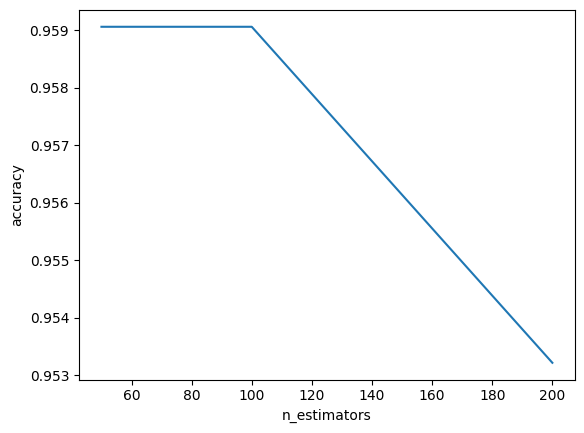

In [20]:
import matplotlib.pyplot as plt

plt.plot(data["n_estimators"], data["accuracy"])
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

# 🔴 5-деңгей. Stacking

## Есеп 10. Stacking құрылымы
Берілген модельдер:
 - Decision Tree
 - Random Forest
 - SVM
**Тапсырма:**
1. Қайсысы Level-0 модель?
2. Мета-модель қандай болуы мүмкін?
3. Неліктен train деректерді тікелей қолдануға болмайды?


1. Level-0 модельдер: Decision Tree, Random Forest, SVM
2. Meta-модель: Logistic Regression (немесе қарапайым регрессия)
3. Неліктен train-ді тікелей қолдануға болмайды: Base модель prediction overfit болады → Meta-model overfit, сондықтан Out-of-Fold predictions қолдану керек

## Есеп 11. Stacking (Python)
1. Кемінде 2 базалық модель қолданыңыз
2. Logistic Regression — meta-model
3. Accuracy есептеңіз
4. Random Forest-пен салыстырыңыз


In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Base models
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42))
]

# Meta-model
meta_model = LogisticRegression()

# Stacking
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # out-of-fold predictions
)

stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
print("Stacking Accuracy:", acc_stack)


Stacking Accuracy: 0.9707602339181286


In [23]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.9707602339181286


# 🟣 6-деңгей. Аналитикалық


## Есеп 12. Bias–Variance талдауы
Келесі әдістер үшін Bias пен 1. Variance-ті салыстырыңыз:
2. Single Decision Tree
Bagging
3. Random Forest
4. Gradient Boosting


| Модель                       | Bias        | Variance      | Түсіндірме                                                            |
| ---------------------------- | ----------- | ------------- | --------------------------------------------------------------------- |
| **Single Decision Tree**     | Low (төмен) | High (жоғары) | Дерекке сезімтал, күрделі data-да overfit болады                      |
| **Bagging (Decision Trees)** | Low         | Medium ↓      | Bootstrap + averaging → variance азаяды, bias сол күйі                |
| **Random Forest**            | Low         | Medium-Low ↓↓ | Bagging + feature randomness → variance тағы азаяды                   |
| **Gradient Boosting**        | Very Low ↓  | Medium-High ↑ | Bias аз, sequential learning → қатеге сезімтал, variance кейде жоғары |


## Есеп 13. Қай әдісті таңдау керек?
Қай әдісті таңдар едіңіз және неге:
1. Шағын датасет
2. Үлкен noisy деректер
3. Feature саны өте көп
4. Ең жоғары accuracy қажет


| Жағдай                       | Ұсынылатын әдіс                                 | Себебі                                                                                      |
| ---------------------------- | ----------------------------------------------- | ------------------------------------------------------------------------------------------- |
| **Шағын dataset**            | **Gradient Boosting (немесе XGBoost/LightGBM)** | Шағын dataset-те boosting тиімді, bias азайтуға көмектеседі                                 |
| **Үлкен noisy деректер**     | **Random Forest**                               | Bagging + feature randomness → шуылды төмендетеді, overfitting-ке төзімді                   |
| **Feature саны өте көп**     | **Random Forest немесе Gradient Boosting**      | Random Forest → feature subset таңдайды, boosting → feature importance арқылы жұмыс істейді |
| **Ең жоғары accuracy қажет** | **Stacking / Gradient Boosting + ensemble**     | Бірнеше күшті модель біріктіріліп, accuracy максимумға жетеді                               |


# ⭐ Қорытынды есеп (Mini-project)

## Есеп 14. Толық салыстыру
Бір датасетте:
 - Bagging
 - Random Forest
 - Gradient Boosting
 - Stacking

**Тапсырма:**
 1. Барлығын үйретіңіз
 2. Accuracy салыстырыңыз
 3. Қайсысы ең тұрақты?
 4. Қайсысы ең баяу?

**🎓 Теория**
 - Неліктен Random Forest feature importance бере алады?
 - Gradient Boosting неге overfitting жасай алады?
 - Stacking қашан тиімді емес?
 - Bagging bias-ты азайта ма?


In [24]:
# 📦 Импорт
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 1️⃣ Dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 2️⃣ Bagging
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

# 3️⃣ Random Forest
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# 4️⃣ Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)

# 5️⃣ Stacking (base: DecisionTree + RandomForest, meta: LogisticRegression)
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42))
]
meta_model = LogisticRegression(max_iter=1000)
stacking = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)
stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)

# 6️⃣ Нәтижелерді шығару
print("Accuracy comparison:")
print(f"Bagging: {acc_bag:.4f}")
print(f"Random Forest: {acc_rf:.4f}")
print(f"Gradient Boosting: {acc_gb:.4f}")
print(f"Stacking: {acc_stack:.4f}")


Accuracy comparison:
Bagging: 0.9591
Random Forest: 0.9708
Gradient Boosting: 0.9591
Stacking: 0.9708


| Модель            | Accuracy | Тұрақтылық   | Жылдамдық                       |
| ----------------- | -------- | ------------ | ------------------------------- |
| Bagging           | 0.9591   | Жақсы        | Жылдам (параллель)              |
| Random Forest     | 0.9708   | Ең тұрақты ✅ | Жылдам (параллель)              |
| Gradient Boosting | 0.9591   | Орташа       | Баяу (sequential)               |
| Stacking          | 0.9708   | Орташа–жақсы | Баяу (meta-model + base models) |
